In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from keras import layers
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

plt.style.use('dark_background')

In [ ]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})


In [ ]:
from google.colab import files
filenya = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
filenya

{'forestfires.csv': b'X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area\n7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0\n7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0\n7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0\n8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0\n8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0\n8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0\n8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0\n8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0\n8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0\n7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0\n7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0\n7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0\n6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0\n6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0\n6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0\n6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0\n5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0\n8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0\n6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0\n6,4,apr,sat,86.3,27.4

In [ ]:
data = pd.read_csv("forestfires.csv")

In [ ]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<h3> This is for Classification problem, I attempt to add a new column, namely size_category to categorize the data into two categories:

    If the value of the area < 6 then the size_category will be labeled as 0 (Small Fire)
    If the value of the area ≥ 6 then the size_category will be labeled as 1 (Wide Fire)

Attribute Information:

    X : x-axis spatial coordinate within the Montesinho park map: 1 to 9
    Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9
    month : month of the year: ‘jan’ to ‘dec’
    day : day of the week: ‘mon’ to ‘sun’
    FFMC : FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
    DMC : DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3
    DC : DC (Drought Code) index from the FWI system: 7.9 to 860.6
    ISI : ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10
    temp : temperature in Celsius degrees: 2.2 to 33.30
    RH : relative humidity in %: 15.0 to 100
    wind : wind speed in km/h: 0.40 to 9.40
    rain : outside rain in mm/m2 : 0.0 to 6.4
    area : the burned area of the forest (in ha): 0.00 to 1090.84

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### EDA

In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
data.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [ ]:
data.shape

(517, 13)

In [ ]:
data = data.drop(['month'], axis = 1)

### Visualization

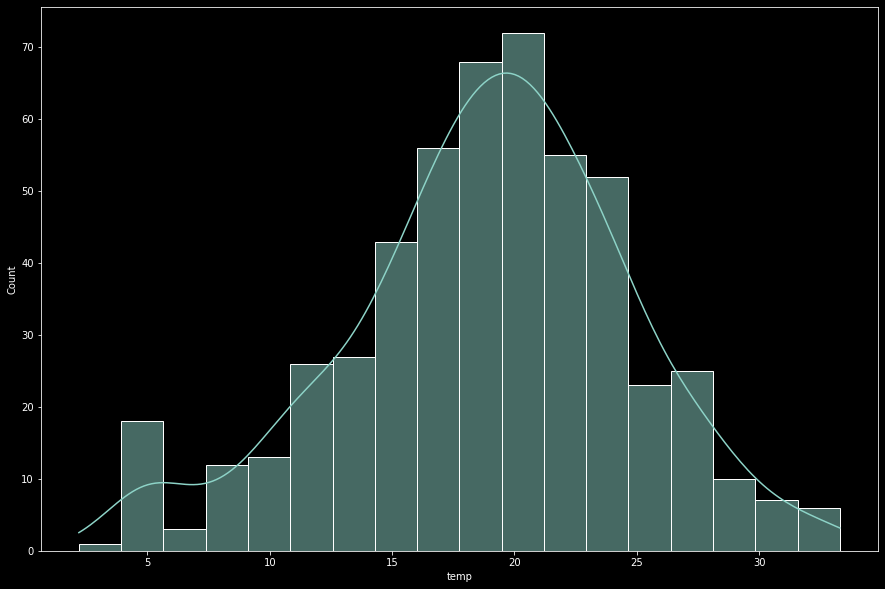

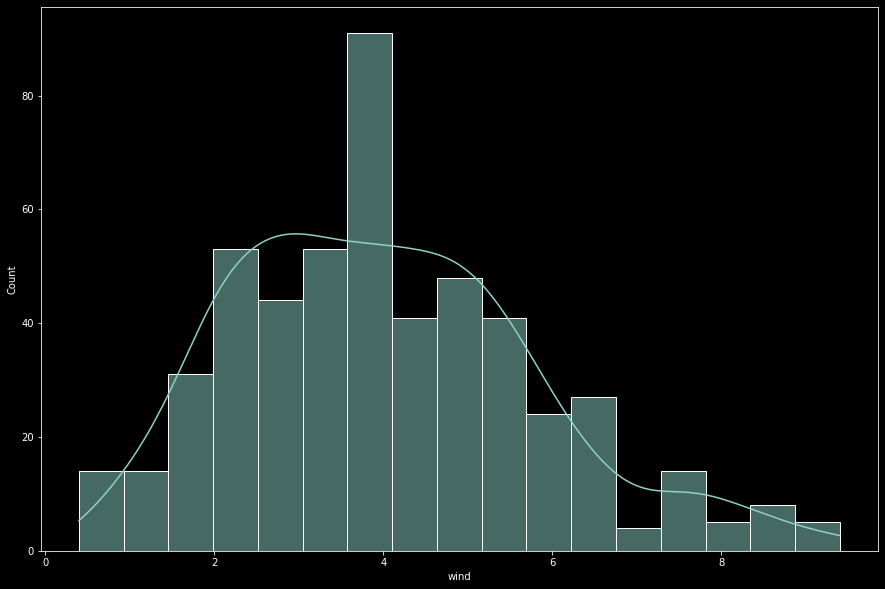

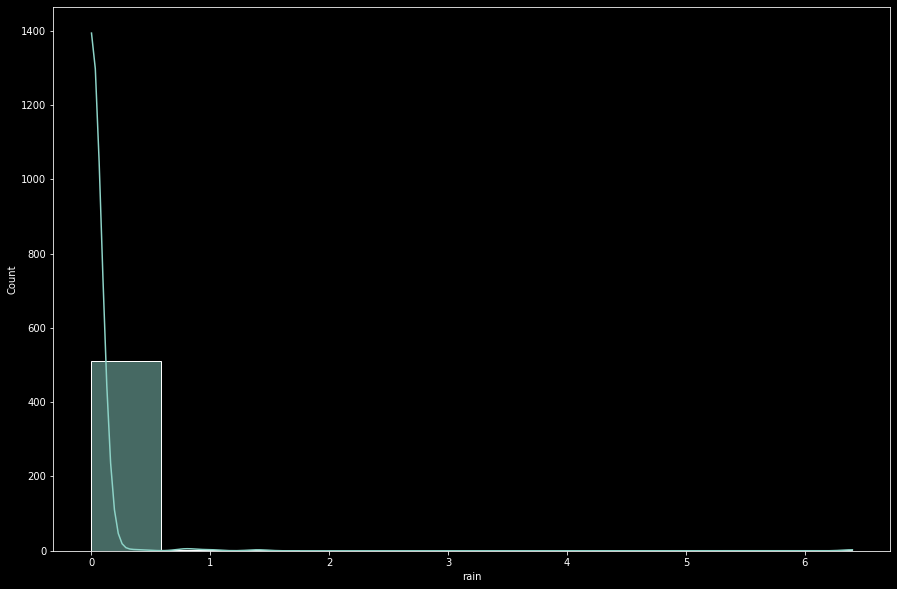

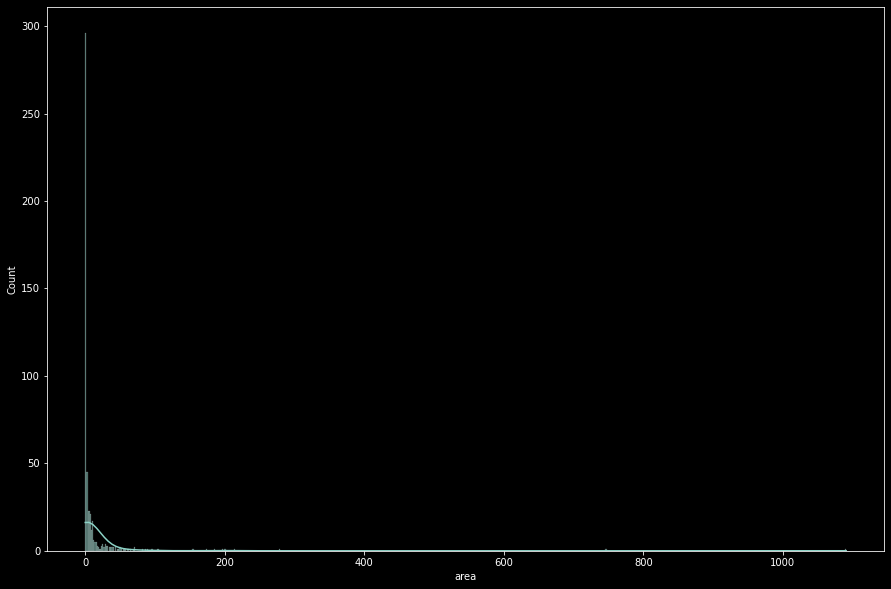

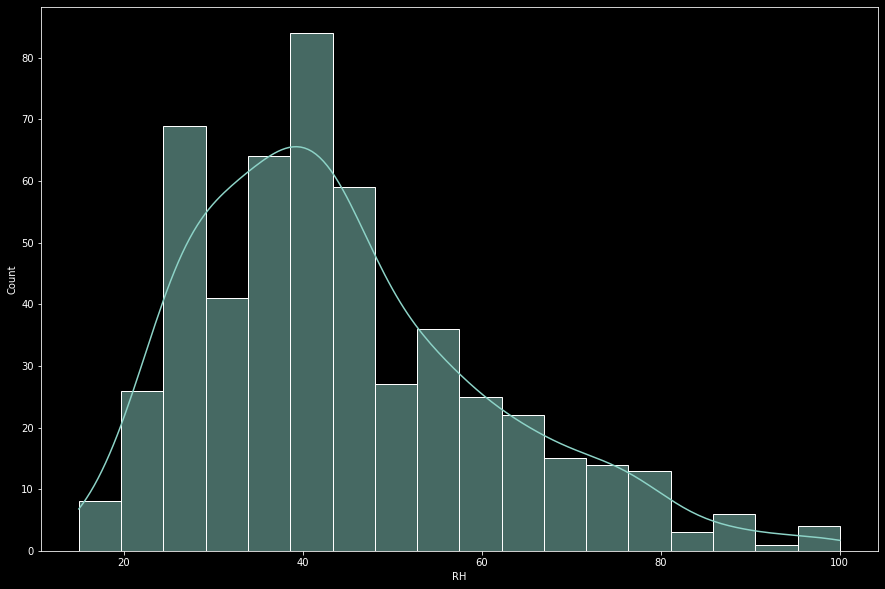

In [ ]:
# Distribute data
dist_univariate_columns = ['temp', 'wind', 'rain', 'area', 'RH']

for column in dist_univariate_columns:
    plt.figure(figsize=(15,10))
    sns.histplot(data=data, x=column,kde=True)
    plt.show()

(11.5, -0.5)

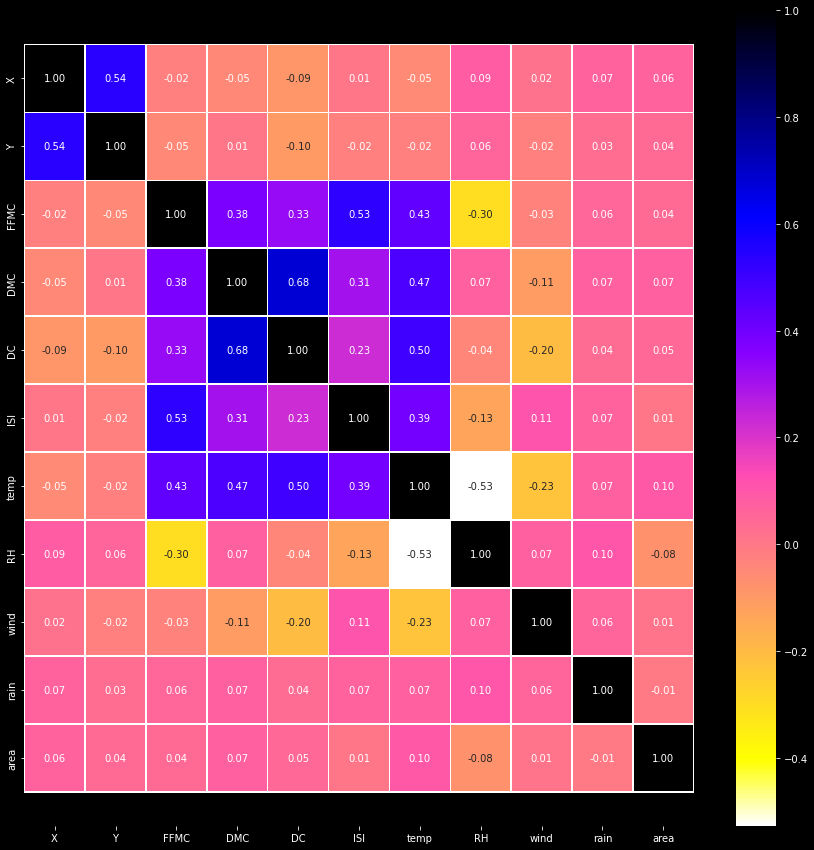

In [ ]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="gnuplot2_r");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Preprocessing

I attempt to add a new column, namely size_category to categorize the data into two categories:

    If the value of the area < 6 then the size_category will be labeled as 0 (Small Fire)
    If the value of the area ≥ 6 then the size_category will be labeled as 1 (Wide Fire)

In [ ]:
data['size_category'] = np.where(data['area']>6, '1', '0')
data['size_category']= pd.to_numeric(data['size_category'])
data.tail(10)

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   day            517 non-null    object 
 3   FFMC           517 non-null    float64
 4   DMC            517 non-null    float64
 5   DC             517 non-null    float64
 6   ISI            517 non-null    float64
 7   temp           517 non-null    float64
 8   RH             517 non-null    int64  
 9   wind           517 non-null    float64
 10  rain           517 non-null    float64
 11  area           517 non-null    float64
 12  size_category  517 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 52.6+ KB


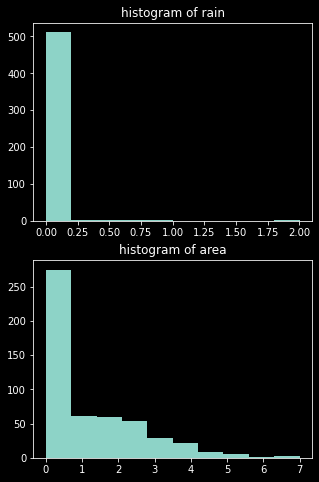

In [ ]:
# natural logarithm scaling (+1 to prevent errors at 0)
data.loc[:, ['rain', 'area']] = data.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(data['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(data['area'])
ax[1].title.set_text('histogram of area')

Because the distributions of rain and area are too skewed and have large outliers, we try to scale it to even out the distribution.

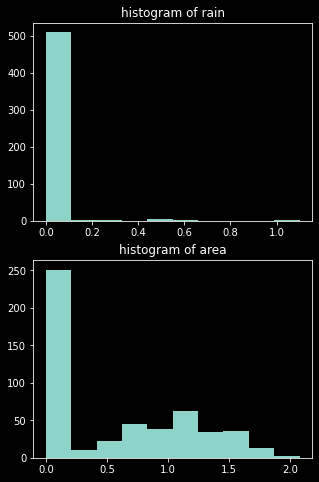

In [ ]:
# natural logarithm scaling (+1 to prevent errors at 0)
data.loc[:, ['rain', 'area']] = data.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(data['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(data['area'])
ax[1].title.set_text('histogram of area')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


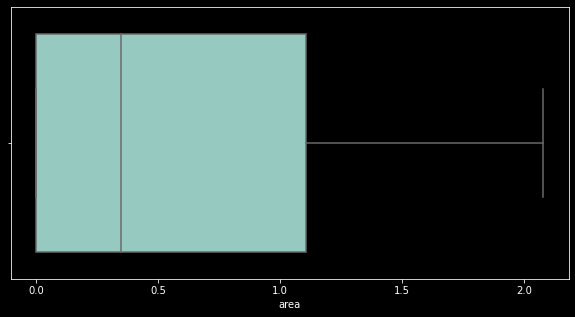

In [ ]:
#Check Outlier on the area variable
plt.figure(figsize=(10,5))
sns.boxplot(data["area"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


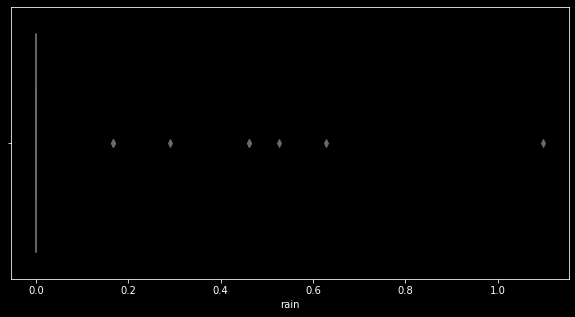

In [ ]:
#Check Outlier on the area variable
plt.figure(figsize=(10,5))
sns.boxplot(data["rain"])
plt.show()

In [ ]:
#Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [ ]:
outlier(data['area'])

Number of Outlier 0


In [ ]:
outlier(data['rain'])

Number of Outlier 8
Outlier observation row:
3
243
286
499
500
501
502
509


In [ ]:
outlier(data['temp'])

Number of Outlier 2
Outlier observation row:
280
282


In [ ]:
data

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.00000,0.000000,0
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.00000,0.000000,0
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.00000,0.000000,0
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.16748,0.000000,0
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.00000,1.100900,1
513,2,4,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.00000,1.611953,1
514,7,4,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.00000,1.252235,1
515,1,4,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.00000,0.000000,0


In [ ]:
data = data.drop(['rain', 'RH', 'ISI','day'], axis=1)

In [ ]:
features = data.drop(['size_category'], axis = 1)
labels = data['size_category']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 5)

In [ ]:
print(f'Total Training feature data : {X_train.shape[0]}')
print(f'Total Training label data : {y_train.shape[0]}')

Total Training feature data : 413
Total Training label data : 413


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# fitting scaler
sc_features = StandardScaler()# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])

X_train.head()

,X,Y,FFMC,DMC,DC,temp,wind,area
0,-1.029886,0.564218,0.029271,0.279212,0.604709,0.407809,-1.473560,-0.448285
1,0.747843,0.564218,0.353985,0.200965,1.042019,-0.128859,-1.227967,-0.046192
2,-0.585454,-0.207870,0.516342,0.534815,0.720816,-0.098193,-0.368390,1.686538
3,0.747843,-0.979958,0.049566,-1.666508,-2.195860,-0.849529,3.192713,1.877017
4,-0.141022,1.336306,-1.249291,-1.461330,-0.812738,-2.168200,0.429788,0.835168


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   temp           517 non-null    float64
 6   wind           517 non-null    float64
 7   area           517 non-null    float64
 8   size_category  517 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 36.5 KB


In [ ]:
data.head()

,X,Y,FFMC,DMC,DC,temp,wind,area,size_category
0,7,5,86.2,26.2,94.3,8.2,6.7,0.0,0
1,7,4,90.6,35.4,669.1,18.0,0.9,0.0,0
2,7,4,90.6,43.7,686.9,14.6,1.3,0.0,0
3,8,6,91.7,33.3,77.5,8.3,4.0,0.0,0
4,8,6,89.3,51.3,102.2,11.4,1.8,0.0,0


In [ ]:
data = data[data != '?']
data.dropna(axis=0, inplace=True)

In [ ]:
data

,X,Y,FFMC,DMC,DC,temp,wind,area,size_category
0,7,5,86.2,26.2,94.3,8.2,6.7,0.000000,0
1,7,4,90.6,35.4,669.1,18.0,0.9,0.000000,0
2,7,4,90.6,43.7,686.9,14.6,1.3,0.000000,0
3,8,6,91.7,33.3,77.5,8.3,4.0,0.000000,0
4,8,6,89.3,51.3,102.2,11.4,1.8,0.000000,0
...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,27.8,2.7,1.100900,1
513,2,4,81.6,56.7,665.6,21.9,5.8,1.611953,1
514,7,4,81.6,56.7,665.6,21.2,6.7,1.252235,1
515,1,4,94.4,146.0,614.7,25.6,4.0,0.000000,0


### Hyperparameter

<h3> Experiment with Epoch

In [ ]:
from keras.layers import Dense, Dropout

In [ ]:
def fit_first_model(x_train, y_train, x_test, y_test, epoch):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=8, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
  
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy())
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('epoch='+str(epoch))
    plt.legend()

In [ ]:
epoch = [50, 100, 150, 200, 250]

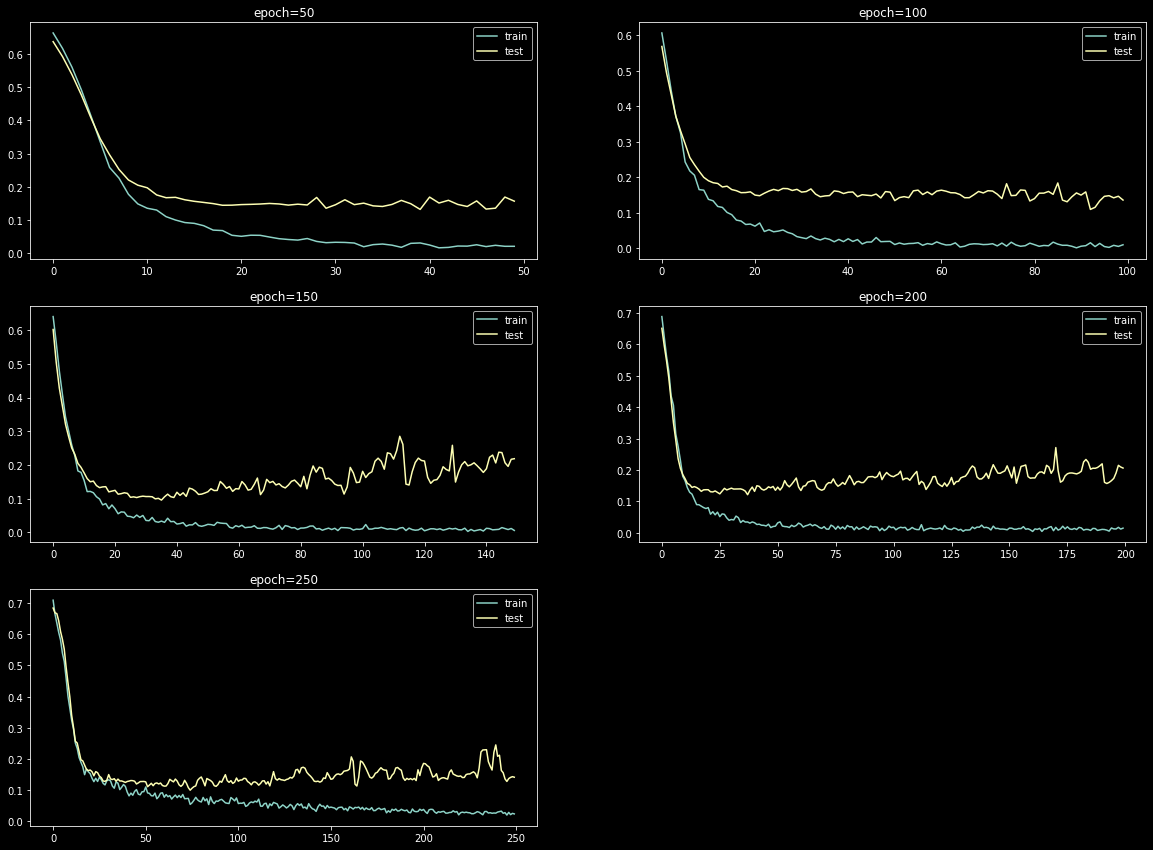

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, epoch[i])

# show learning curves
plt.show()

i'll choose epoch with 100 value

### Batch Size

In [ ]:
def fit_first_model(x_train, y_train, x_test, y_test, batch):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=8, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
  
  
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy())
    
    # fit model
    epoch = 100
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('batch_size='+str(batch))
    plt.legend()

In [ ]:
batchs = [1, 4, 8, 16, 32, 64, 128, 256]

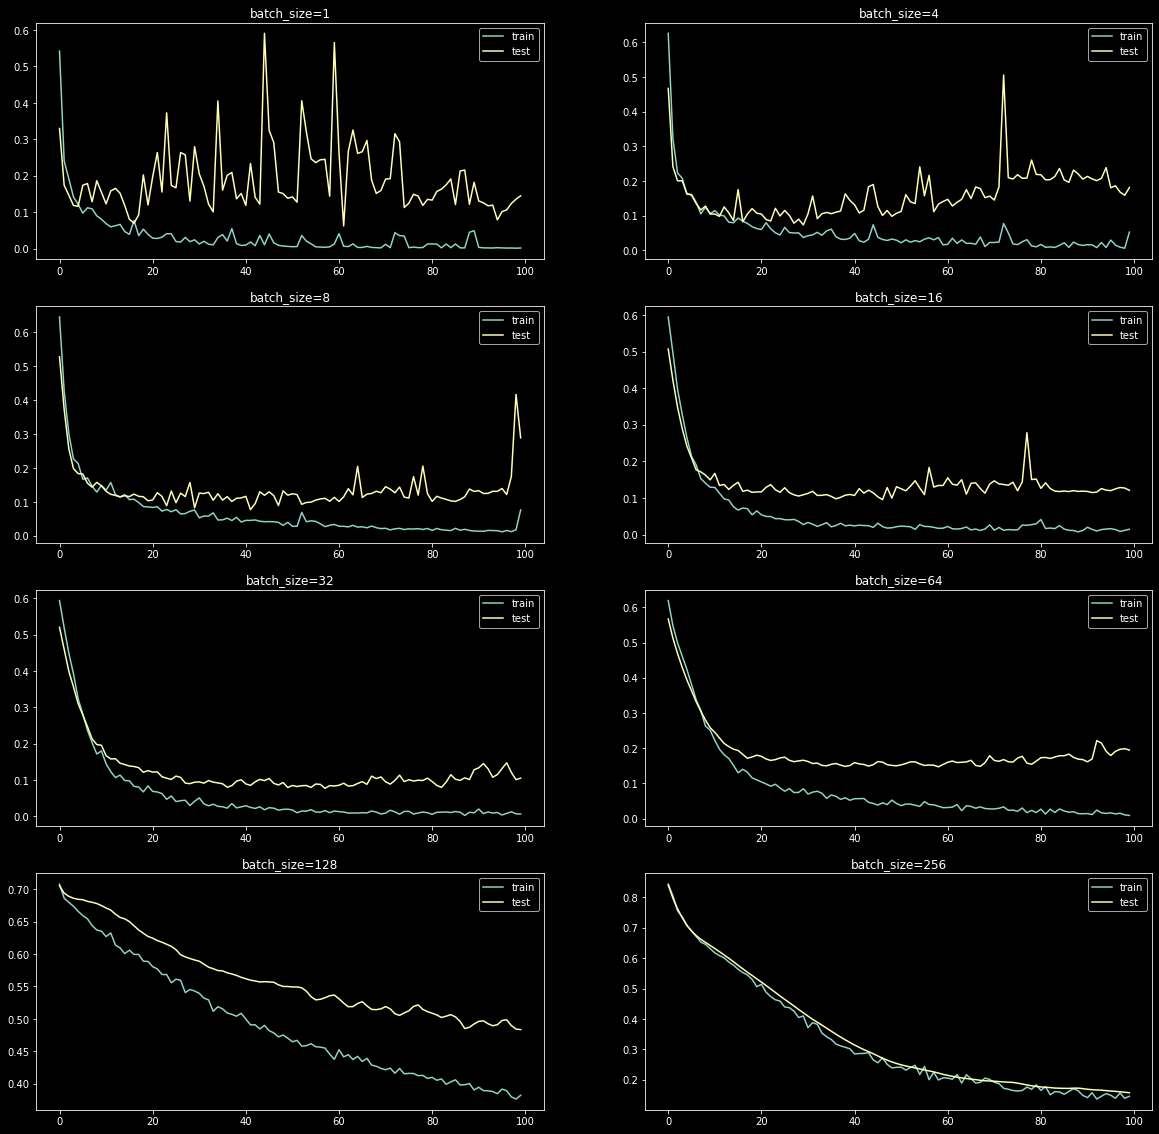

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(len(batchs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, batchs[i])

# show learning curves
plt.show()

choose 128 for batch size

### Experiment with Learning Rate

In [ ]:
def fit_first_model(x_train, y_train, x_test, y_test, lr):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=8, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
  
  
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
              loss=tf.keras.losses.BinaryCrossentropy())
    
    # fit model
    epoch = 100
    batch = 256
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('learning_rates='+str(lr))
    plt.legend()

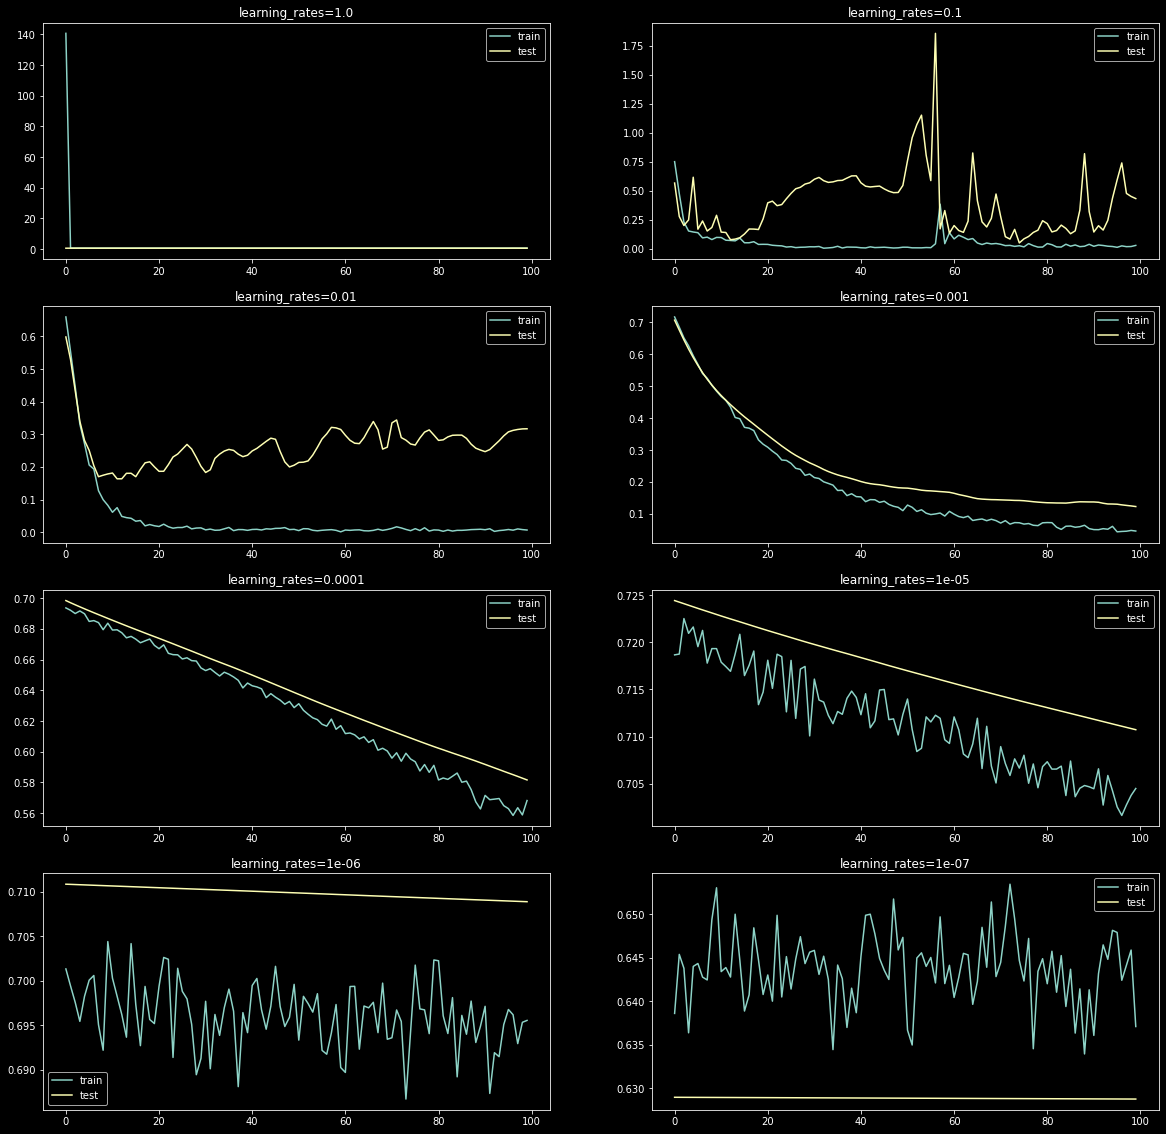

In [ ]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(20, 20))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()


### Experiment with Loss Function

In [ ]:
# fit a model and plot learning curve

def fit_first_model(x_train, y_train, x_test, y_test, loss):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=8, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
  
  
    
    # compile model
    model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam())
    
    # fit model
    epoch = 100
    batch = 256
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('loss_function='+str(loss))
    plt.legend()



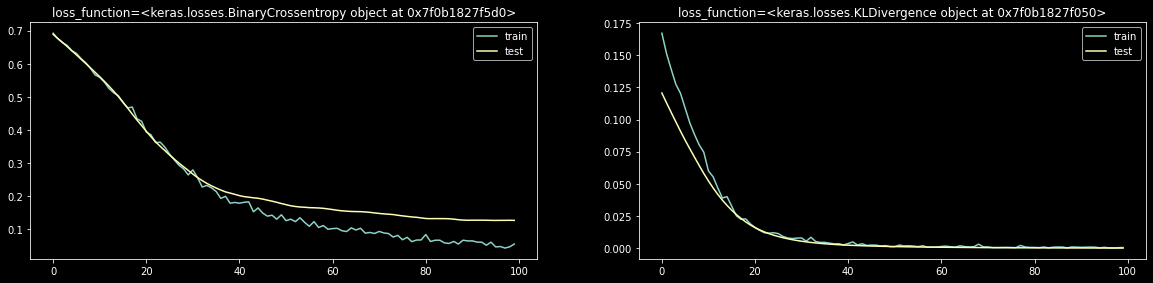

In [ ]:
# create learning curves for different activation functions
loss_functions = [keras.losses.BinaryCrossentropy(), keras.losses.KLDivergence()]


plt.figure(figsize=(20, 20))
for i in range(len(loss_functions)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, loss_functions[i])

# show learning curves
plt.show()


### Experiment with Activation Functions

In [ ]:
# fit a model and plot learning curve

def fit_first_model(x_train, y_train, x_test, y_test, activation):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=8, activation=activation))
    model.add(layers.Dense(64, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation=activation))
  
  
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy())
    
    # fit model
    epoch = 100
    batch = 256
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Activation='+str(activation))
    plt.legend()

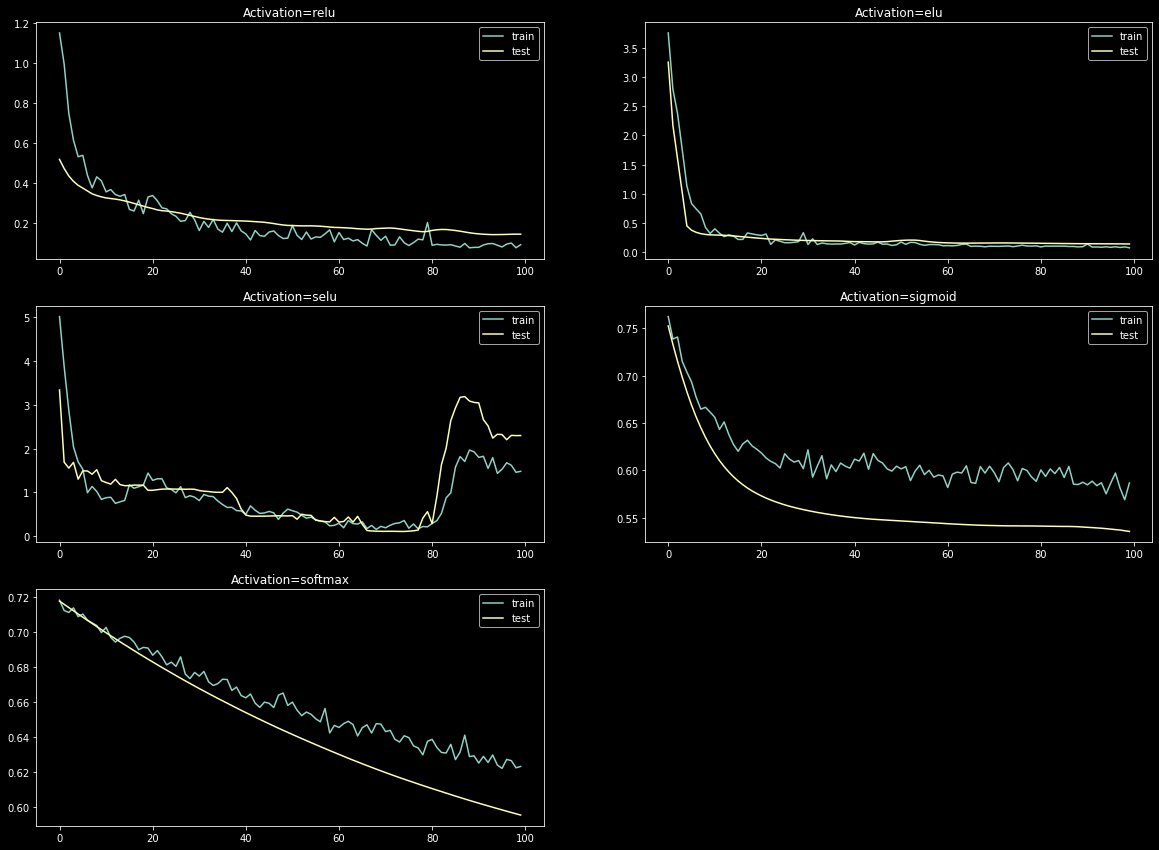

In [ ]:
# create learning curves for different activation functions
activation_functions = ['relu', 'elu', 'selu', 'sigmoid','softmax']


plt.figure(figsize=(20, 20))
for i in range(len(activation_functions)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test,activation_functions[i])

# show learning curves
plt.show()

### Experiment with Optimizers

In [ ]:
def fit_first_model(x_train, y_train, x_test, y_test, optimizer):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=8, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
  
  
    
    # compile model
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy())
    
    # fit model
    epoch = 100
    batch = 256
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('optimizer='+str(optimizer))
    plt.legend()

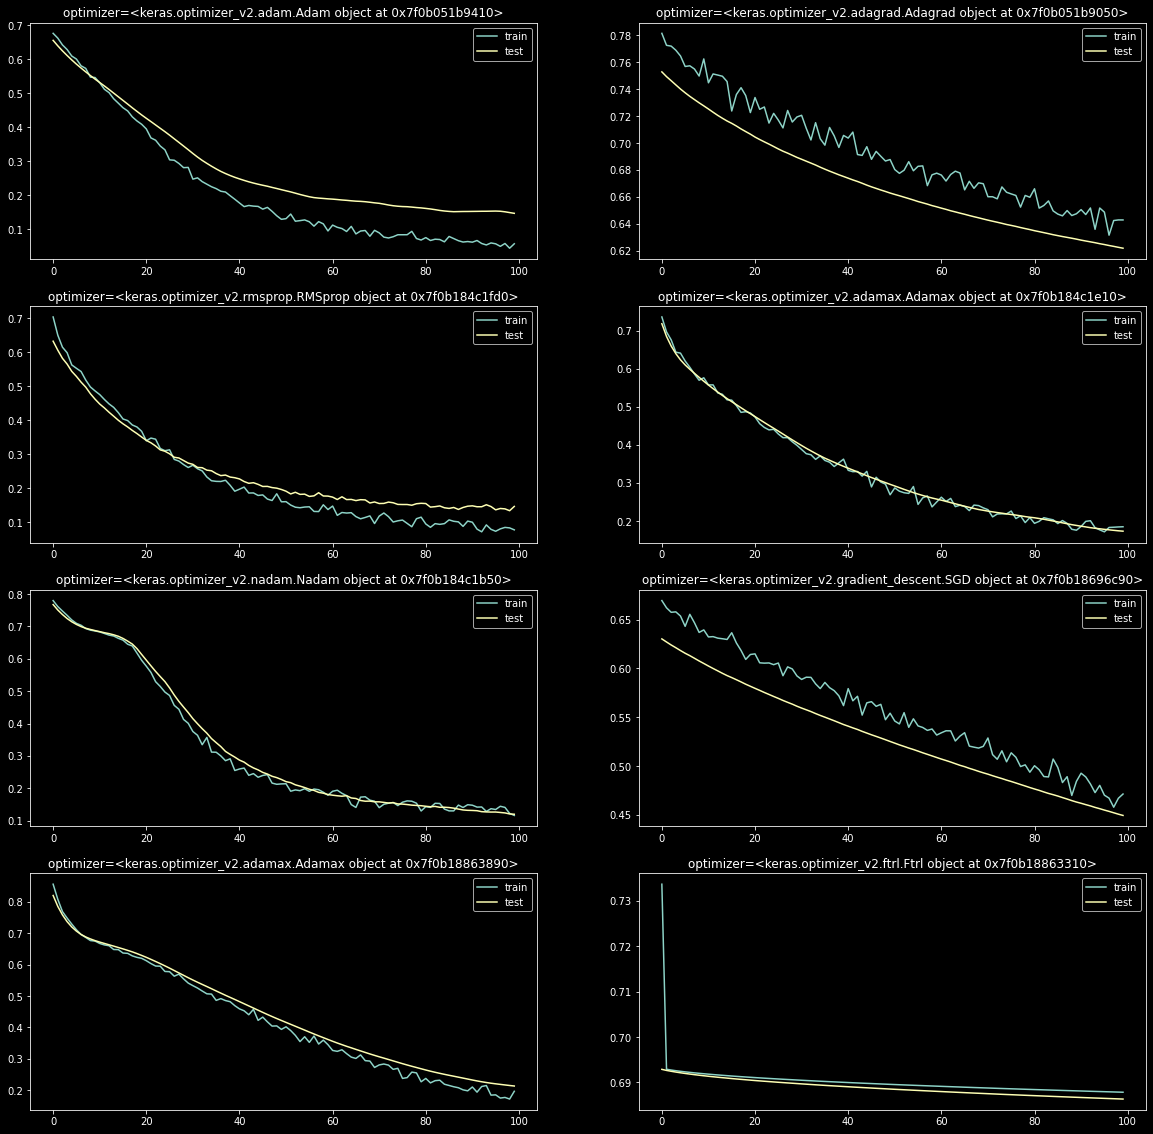

In [ ]:
# create learning curves for different optimizers
optimizers = [keras.optimizers.Adam(), keras.optimizers.Adagrad(), keras.optimizers.RMSprop(), keras.optimizers.Adamax(),
              keras.optimizers.Nadam(), keras.optimizers.SGD(), keras.optimizers.Adamax(), keras.optimizers.Ftrl()]


plt.figure(figsize=(20, 20))
for i in range(len(optimizers)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test,optimizers[i])

# show learning curves
plt.show()

Based on the experiments

I deciced many things that I choose single input layer, then I set single hidden layer, single dropout layer, and single output layer. 

Although i didn't do special experiment, but in my opinion this data no need many layers

Then, I set epoch to 100, batch size to 128, learning rate to 0.001. Furthermore, I set my activation function to ReLu and Sigmoid for my output layer. Next, for my loss function i put BinarryCrossEntropy because my case is classification. Lats, I set Adam Optimizer.


### Final Model

In [ ]:
model = Sequential([
    layers.Dense(units=32, input_dim=8, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs = 100
batchs = 128
history = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=epochs,
  batch_size=batchs
)


Epoch 1/100
4/4 [==============================] - 2s 113ms/step - loss: 0.6596 - accuracy: 0.6271 - val_loss: 0.4718 - val_accuracy: 0.8173
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4193 - accuracy: 0.8547 - val_loss: 0.3066 - val_accuracy: 0.8942
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 0.2464 - accuracy: 0.9128 - val_loss: 0.2256 - val_accuracy: 0.9231
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.1821 - accuracy: 0.9177 - val_loss: 0.1668 - val_accuracy: 0.9231
Epoch 5/100
4/4 [==============================] - 0s 36ms/step - loss: 0.1371 - accuracy: 0.9564 - val_loss: 0.1665 - val_accuracy: 0.9231
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1033 - accuracy: 0.9758 - val_loss: 0.1796 - val_accuracy: 0.9038
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0845 - accuracy: 0.9709 - val_loss: 0.1156 - val_accuracy: 0.9327
Epoch 8/100
4/4 [==

### Model Evaluation

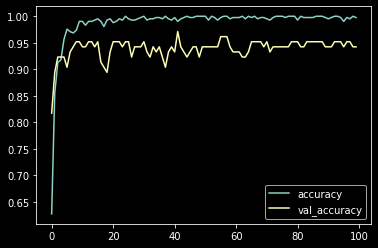

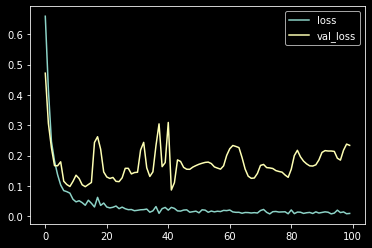

In [ ]:
import pandas as pd

evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.942


### Model Improvement Early Stopping (Patience, Model Checkpoint)

In [ ]:
def init_model():
  
  model = Sequential()
  model.add(Dense(32, input_dim=8, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
  
  
  return model

# init model
model = init_model()


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

# model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)# fitting model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, batch_size=128, callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.80769, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.80769 to 0.88462, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.88462 to 0.92308, saving model to best_model.h5

Epoch 4: val_accuracy improved from 0.92308 to 0.95192, saving model to best_model.h5

Epoch 5: val_accuracy did not improve from 0.95192

Epoch 6: val_accuracy did not improve from 0.95192

Epoch 7: val_accuracy did not improve from 0.95192

Epoch 8: val_accuracy did not improve from 0.95192

Epoch 9: val_accuracy did not improve from 0.95192

Epoch 10: val_accuracy did not improve from 0.95192

Epoch 11: val_accuracy did not improve from 0.95192

Epoch 12: val_accuracy did not improve from 0.95192

Epoch 13: val_accuracy improved from 0.95192 to 0.96154, saving model to best_model.h5

Epoch 14: val_accuracy did not improve from 0.96154

Epoch 15: val_accuracy did not improve from 0.96154

Epoch 16: val_accuracy did not improve fr

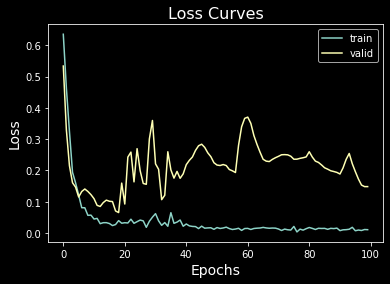

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

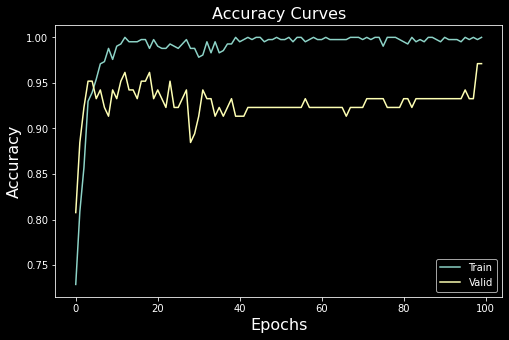

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 1.000, Valid: 0.971


### Conclusion

Conclusion

In clonslusion, after I did model improvent, validation up to 0.971